In [24]:
import numpy as np
import itertools
import random 
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import collections
from queue import Queue
from collections import deque as queue
import time 



def constructGrid(rows, columns):
    
    '''The following function will accept two arguments rows, columns
       The grid matrix is row x column matrix which is constructed using numpy as 
       numpy array is much faster than list. A matrix of 1's is created
       
       Return 
       -----------------------------------------
       gridmatrix  : numpy array'''
    
    
    gridmatrix = np.ones((rows, columns))
    
    return gridmatrix

def constructObstacleGrid(gridmatrix, obst_percent, rows,columns):
    
    '''The function takes in a matrix, percentage for obstacle , rows and columns
       as an argument. The function will, depending upon the percentage will arbitrarily
       change the 
       values of gridmatrix to 0. Zero value in the grid matrix represents an obstacle
       in the grid. The returned matrix will comprise of only 0 and 1's. 
       
       Arguments
       --------------------------------------------
       gridmatrix   : numpy
       obst_percent : integer
       rows         : integer
       columns      : integer
       
       
       Return 
       ---------------------------------------------
       gridmatrix : numpy array
       
       '''
    
    # Generate all possible pairs of the matrix using permutation function provided 
    # in itertools to generate all possible pairs 
    permute_max_obs_pairs = []
    
    # using list comprehension compute all possible pairs of index
    find_all_pairs = ([(i,j) for i in range(0,rows) for j in range(0,columns)])
    
    # Produce a percentage of obstacle in the grid
    upp_limit = math.ceil(len(find_all_pairs)* (obst_percent/100))
    
    #Generate  random pairs of indices and save them in a list 
    for i in range(0 , upp_limit):
        permute_max_obs_pairs.append(random.choice(find_all_pairs))
    
    #Now use tuple unpacking and change the values at index pairs to 0 to show obstacles
    for i,j in permute_max_obs_pairs:
        gridmatrix[i][j] = 0
    
    
    return gridmatrix


def showInitialGrid(gridmatrix):
    cmap = colors.ListedColormap(['black','white'])
    plt.figure(figsize = (15,10))
    plt.pcolor(gridmatrix[::-1], cmap=cmap, edgecolors = 'k', linewidths =4)
    plt.title("A grid showing search Space\n", fontsize = 25)
    plt.show()
    

def showSearchGrid(gridmatrix):
    cmap = colors.ListedColormap(['red','green','black','white'])
    plt.figure(figsize = (15,10))
    plt.pcolor(gridmatrix[::-1], cmap=cmap, edgecolors = 'k', linewidths =4)
    plt.title("A grid showing search Space with Start and Goal Node\n", fontsize = 20)
    plt.show()
    

def showFinalGrid(gridmatrix):
    cmap = colors.ListedColormap(['yellow','red','green','black','white'])
    plt.figure(figsize = (15,10))
    plt.pcolor(gridmatrix[::-1], cmap=cmap, edgecolors = 'k', linewidths =4)
    plt.title("A grid showing Path with Start and Goal Node\n", fontsize = 20)
    plt.show()
    
    
def possibleSuccesors(gridmatrix,current_cell):
    
    '''The function will generate all possible moves from a given cell of a given matrix. The only legal 
       possible moves are North South East West. Diagonal moves such as NW NE etc are not allowed 
       The function returns a list of all possible moves. The list stores tuple values of 
       neighbouring cells.
       
       Return
       ------------------------------------------------
       
       lst : list
       
    '''
    # Row vector for left and right
    dr_row_vect = [-1,0,1,0]
    #Column Vector for up and down
    dr_col_vect = [ 0, 1, 0, -1]
    lst = []
    
    # This is to prevent situation in which current cell itself is  an obstacle
    # If that's the case algorithm will generate its neighbours and start to search 
    # an incorrect path 
    
    if(gridmatrix[current_cell]!=0):
        
        # Iterate to 4 as only 4 moves are possible 
        for i in range(0,4):
            neighbouring_row_cell = current_cell[0] + dr_row_vect[i]
            neighbouring_col_cell = current_cell[1] + dr_col_vect[i]
            
            #Check if the cell is within the grid and is not an obstacle cell
            if(0<= neighbouring_row_cell<gridmatrix.shape[0] 
               and 0<= neighbouring_col_cell < gridmatrix.shape[1] 
               and gridmatrix[neighbouring_row_cell][neighbouring_col_cell]!=0 ):
                
                lst.append(tuple((neighbouring_row_cell,neighbouring_col_cell)))
                
                
    return lst


def grassFire(gridmatrix, start, end):
    
    '''The above function performs a BFS technique to find the shortest path. The function 
       returns distance matrix which stores the distance of various cells from the start cell
       
       Return 
       --------------------------
       d (distance matrix) : numpy
       flag                : bool
       '''
    #Create an array corresponding to gridmatrix to store the distance of nodes
    d = np.zeros((gridmatrix.shape[0], gridmatrix.shape[1]))
    
    # Create a queue for BFS implementation and to store set of all the nodes(matrix indicies)
    # to be searched. Also maintain a set to check if particular node has been visited or not
    frontier = queue()
    # Add the goal node to the queue and the set 
    explored = set([end])
    frontier.append(end)
    flag = False

    # 1. For each node (pair of matrix index) set the distance to -1 or infinity
    for i in range(0,gridmatrix.shape[0]):
        for j in range(0,gridmatrix.shape[1]):
            d[i][j] = -1
            
    # 2. Set the distance to  goal node as 0.  d[end] =0 
    d[end[0]][end[1]] = 0        
    
    # 3. While the frontier is not empty
    while len(frontier)>0:
        
        #4. Remove the first node in the queue
        current_node = frontier.popleft()
        
        #5. If a path is found break the loop
        if current_node == start:
            print("******************Found a path *********************DONE!")
            print("\nShortest path is of length :", d[start[0]][start[1]]+1)
            flag = True
            return d, flag
    
        #6. For each node find all possible neighbours.Neighbours cannot be obstacles i.e 0 
        next_steps = possibleSuccesors( gridmatrix , current_node )
    
        for x in next_steps:
            if (d[x[0]][x[1]] == -1 and x not in explored):
                #7. Update the distance and add the node back to the frontier and explored set
                d[x[0]][x[1]] = d[current_node[0]][current_node[1]]+1
                frontier.append(x)
                explored.add(x)
                
            
    return d,flag

def backTrace(gridmatrix,distancematrix,start,goal):
    
    '''The following function returns the shortest path from start to goal. From the start cell
       the function finds  path which requires minimum number of steps to reach the goal node.
       The number of steps required is stored in the distance matrix. Distance matrix provides
       the distance while grid matrix will provide information about all possible moves and obstacles
       
        Return
        --------------------------
        ls_path    : list  
    
    '''

    ls_path=[start]
    current = start
    seen = set([start])
    d    =  distancematrix
    
    while(current!= goal):
        next_move = possibleSuccesors(gridmatrix ,current)
        
        for x in next_move:
            # Move to the cell with the smallest distance value in the adjacent cells
            if (d[x[0]][x[1]] < d[current] and d[x[0]][x[1]]!=-1  and x not in seen):
                ls_path.append(x)
                seen.add(x)
                current = x

                
    return ls_path
    


def getDestination(rows, columns):
    flag = True
    
    
    while True:
        
        try:
            print("\n-----------Enter destination cell column value. Enter row value first.----------")
            print(f"Tip : Enter row greater than {math.ceil(rows/2)} and column greater than {math.ceil(columns*2/3)}")
            row_int,col_int = int(input()), int(input())
            
            if ((row_int in range(0, rows)) and (col_int in range(0, columns))):
                if((row_int > math.ceil(rows/2)) and (col_int > math.ceil((columns*2)/3))):
                    return(row_int,col_int)
                    break
                    
                elif((row_int < math.ceil(rows/2)) and (col_int > math.ceil((columns*2)/3))):
                    print("Row size incorrect. Enter row cell value such that the value is greater than half the number of total rows ")
                    
                elif((row_int > math.ceil(rows/2)) and (col_int < math.ceil((columns*2)/3))): 
                    print("Column size incorrect. Enter column cell  value such that the value is greater than 2/3 of total columns ")
                    
                elif((row_int == math.ceil(rows/2)) and (col_int == math.ceil((columns*2)/3))): 
                    print("Error!! Row exactly is equal to half the total number of rows and column is exactly equal to two-thirds of toal column")
                    print("Tip: Increase row and column by atleast one to get the correct combination")
                    
                else:
                    print("Incorrect row and column cell size. Please enter row value greater than half the total number of rows.\
                    Column value should be greater than two thirds of the total columns")
                    
                
            else:
                print("Please enter a number of rows and columns corresponding to the grid size")
        
        except ValueError:
            print("----Exception ! Please enter an integer number------")
            
            
def driver():
   

    while True:
        try:
            print('*********Please enter number of rows and columns****************')
            rows, columns = int(input()), int((input()))
            
            if(rows > 7 and columns > 7):
                break
                
            else:
                print("---------------Grid should be atleast 8x8------------")
        
        except ValueError:
            print("------------Sorry Please enter an integer number-----------")
            
    #create a matrix of rows and columns
    gridmatrix = constructGrid(rows, columns)
    
    
    # Prompt user to enter percentage of obstacle 
    while True:
        try:
            print("\n@@@@@@@@@@@@@ Enter obstacle Percentage( value between 15-20) @@@@@@@@")
            obst_percent = float(input())
            
            # as the last number is not inclusive give range from 15 to 21 so that 20 is included
            if(obst_percent in range(15,21)):
                break;
            else:
                print("!!!!!!!!!!!!!! Number not in range . Please an integer enter number between 15-20 !!!!!!!!!!!!")
                continue
            
        except ValueError:
            print("--------Exception ! Please enter a float or integer number------")
    
    #Overide the pervious grid matrix which was created without the obstacles
    gridmatrix = constructObstacleGrid(gridmatrix, obst_percent, rows, columns)
    showInitialGrid(gridmatrix)
    
    
    while True:
        try:
            print("\n######### Enter start cell column value. Row cell default value is set to 0 ##########")
            start_int = int(input())
            
            if(start_int in range(0,columns) and gridmatrix[0][start_int]!=0):
                break
            
            elif(gridmatrix[0][start_int] == 0):
                print("The start node is the obstacle node. Please try different value")
                
            else:
                print( "Invalid Cell !!! Column Value should less than or equal to the total columns in the grid")
    
            
        except ValueError:
            print("----Exception ! Please enter an integer number------")
            
        
        
    #assign start and destination cell
    start_tuple = tuple((0,start_int))
    
    #Instead of passing rows and column size
    #Use the actual created groidmatrix sizes to get the destination tuple 
    # even though they are equal 
    destination_tuple = getDestination(gridmatrix.shape[0], gridmatrix.shape[1])
    
    #Show new grid with start and destination node
    #To mark start and end assign matrix any value to at start and end position for ListColormap in showSearchGrid()
    #Pass a copy of the the grid . DOnt make any modifications to the actual grid
    #This code is just to display the grid. Note the original matrix gridmatrix is unchanged
    g_copy = gridmatrix.copy()
    if(g_copy[start_tuple]!= 0):
        g_copy[start_tuple] = -1
    
    g_copy[destination_tuple] = -2
    
    showSearchGrid(g_copy)
    
    #Comment to put the thread to sleep so output is delayed
    time.sleep(5)
    
    
    #Grass fire algorithm implementation. Returns  distance matrix corresponding to
    # the gridmatrix which stores distance values from goal to start node
    
    distancematrix, flag = grassFire(gridmatrix, start_tuple, destination_tuple)
    
    # if flag returns true a path is found else no path exists
    
    if(flag == False):
        print("!!!!!!!!! Sorry no path exists from start to goal grid !!!!!!!!!!!")
        
    else:
        print("******************$$$$Eliza has found a path$$$*******************\n")
        print("^^^^^^^^^Corresponding Distance Matrix^^^^^^^^^ :\n",distancematrix)
        path_list = backTrace(gridmatrix,distancematrix,start_tuple, destination_tuple)
        print("\n@@@@@@@@@@@@@@@@@ Indices Corresponding to Shortest Path @@@@@@@@@\n",path_list)
        
        
        #To show the path using matplotlib like previously done to show starting and
        # and ending node on the search grid. Use the previous g_copy
        for i in path_list:
            if(i==start_tuple or i==destination_tuple):
                continue
            else:
                g_copy[i] = -3
        showFinalGrid(g_copy)
        
        
        
        
        #Now we have found a list containing the path for coresponding distance matrix
        # Now for the corresponding index value mark them with a value to show that they belong
        # to that path
        
        # Show the corresponding grid Matrix with the path
        for i in path_list:
            gridmatrix[i] = -3
            
        print('*************** Matrix after complete Search *********\n', gridmatrix)
    
        
    
    
    
    
    
    

*********Please enter number of rows and columns****************
4
4
---------------Enter grid size greater than 7x7------------
*********Please enter number of rows and columns****************
8
8

@@@@@@@@@@@@@ Enter obstacle Percentage( value between 15-20) @@@@@@@@
20


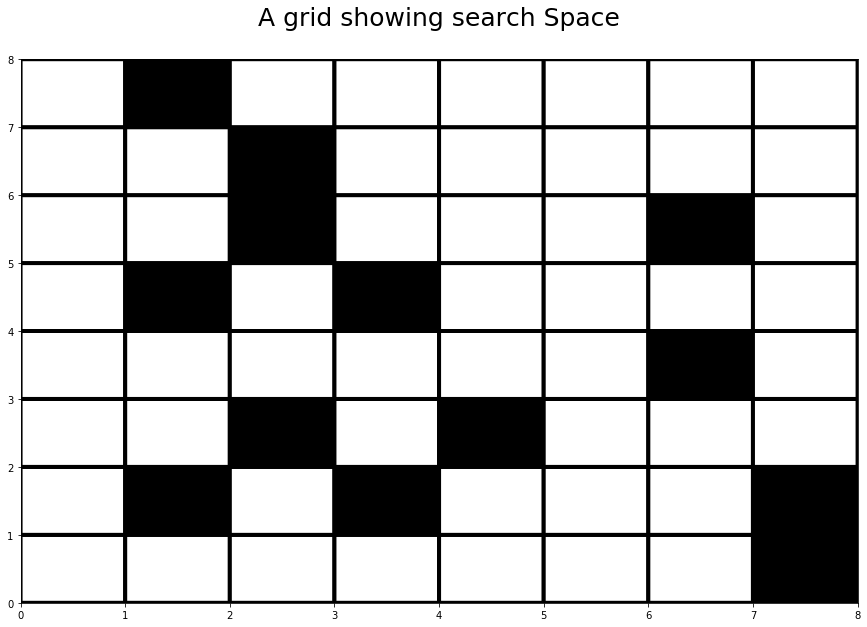


######### Enter start cell column value. Row cell default value is set to 0 ##########
3

-----------Enter destination cell column value. Enter row value first.----------
Tip : Enter row greater than 4 and column greater than 6
5
7


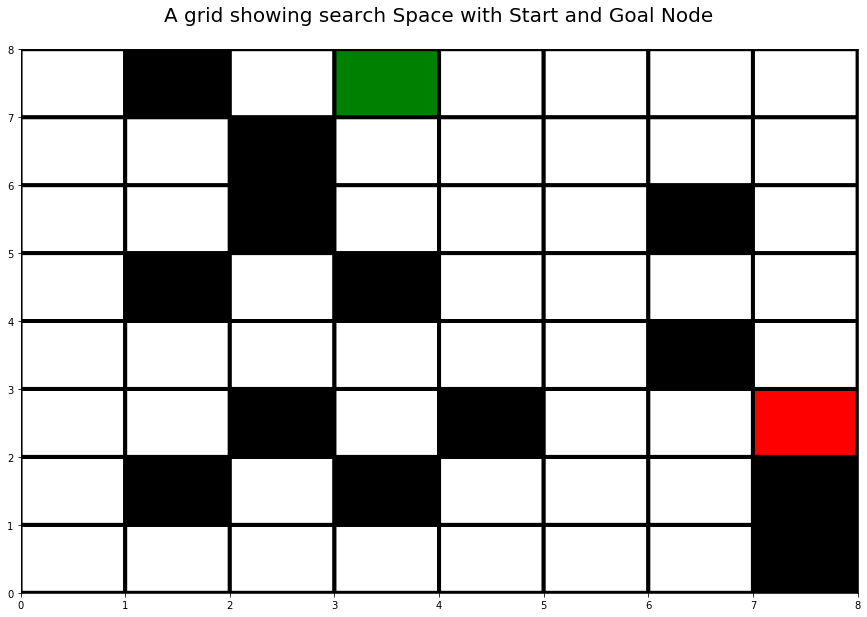

******************Found a path *********************DONE!

Shortest path is of length : 10.0
******************$$$$Eliza has found a path$$$*******************

^^^^^^^^^Corresponding Distance Matrix^^^^^^^^^ :
 [[-1. -1. -1.  9.  8.  7.  6.  5.]
 [-1. -1. -1.  8.  7.  6.  5.  4.]
 [-1. -1. -1.  7.  6.  5. -1.  3.]
 [ 9. -1.  7. -1.  5.  4.  3.  2.]
 [ 8.  7.  6.  5.  4.  3. -1.  1.]
 [ 9.  8. -1.  6. -1.  2.  1.  0.]
 [-1. -1.  8. -1.  4.  3.  2. -1.]
 [ 9.  8.  7.  6.  5.  4.  3. -1.]]

@@@@@@@@@@@@@@@@@ Indices Corresponding to Shortest Path @@@@@@@@@
 [(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7)]


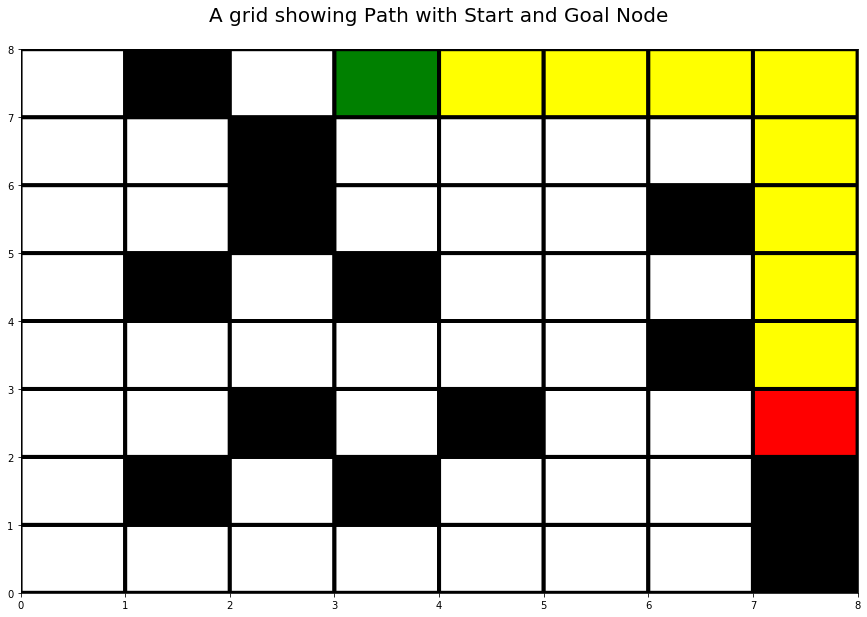

*************** Matrix after complete Search *********
 [[ 1.  0.  1. -3. -3. -3. -3. -3.]
 [ 1.  1.  0.  1.  1.  1.  1. -3.]
 [ 1.  1.  0.  1.  1.  1.  0. -3.]
 [ 1.  0.  1.  0.  1.  1.  1. -3.]
 [ 1.  1.  1.  1.  1.  1.  0. -3.]
 [ 1.  1.  0.  1.  0.  1.  1. -3.]
 [ 1.  0.  1.  0.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.]]


In [25]:
driver()